In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Using TensorFlow backend.


In [2]:
with open('mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

In [3]:
images = images.reshape((-1, 28 ** 2))
images = images / 255.

In [4]:
input_stage = Input(shape=(784,))
encoding_stage = Dense(100, activation='relu')(input_stage)
decoding_stage = Dense(784, activation='sigmoid')(encoding_stage)
autoencoder = Model(input_stage, decoding_stage)

In [5]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [6]:
autoencoder.fit(images, images, epochs=100)

Epoch 1/100
10000/10000 [==============================] - 3s 293us/step - loss: 0.3173
Epoch 2/100
10000/10000 [==============================] - 2s 229us/step - loss: 0.2338
Epoch 3/100
10000/10000 [==============================] - 2s 225us/step - loss: 0.2045
Epoch 4/100
10000/10000 [==============================] - 2s 233us/step - loss: 0.1859
Epoch 5/100
10000/10000 [==============================] - 2s 226us/step - loss: 0.1732
Epoch 6/100
10000/10000 [==============================] - 2s 232us/step - loss: 0.1634
Epoch 7/100
10000/10000 [==============================] - 2s 238us/step - loss: 0.1555
Epoch 8/100
10000/10000 [==============================] - 2s 235us/step - loss: 0.1488
Epoch 9/100
10000/10000 [==============================] - 2s 205us/step - loss: 0.1430
Epoch 10/100
10000/10000 [==============================] - 2s 233us/step - loss: 0.1380
Epoch 11/100
10000/10000 [==============================] - 3s 270us/step - loss: 0.1336 
Epoch 12/100
10000/10000 [===

10000/10000 [==============================] - 2s 222us/step - loss: 0.0759
Epoch 93/100
10000/10000 [==============================] - 2s 227us/step - loss: 0.0758
Epoch 94/100
10000/10000 [==============================] - 2s 230us/step - loss: 0.0757
Epoch 95/100
10000/10000 [==============================] - 2s 223us/step - loss: 0.0756
Epoch 96/100
10000/10000 [==============================] - 2s 225us/step - loss: 0.0755
Epoch 97/100
10000/10000 [==============================] - 2s 226us/step - loss: 0.0754
Epoch 98/100
10000/10000 [==============================] - 2s 225us/step - loss: 0.0754
Epoch 99/100
10000/10000 [==============================] - 2s 225us/step - loss: 0.0753
Epoch 100/100
10000/10000 [==============================] - 2s 225us/step - loss: 0.0752


In [7]:
encoder_output = Model(input_stage, encoding_stage).predict(images[:5])

In [8]:
encoder_output = encoder_output.reshape((-1, 10, 10)) * 255

In [9]:
decoder_output = autoencoder.predict(images[:5])

In [10]:
decoder_output = decoder_output.reshape((-1, 28, 28)) * 255

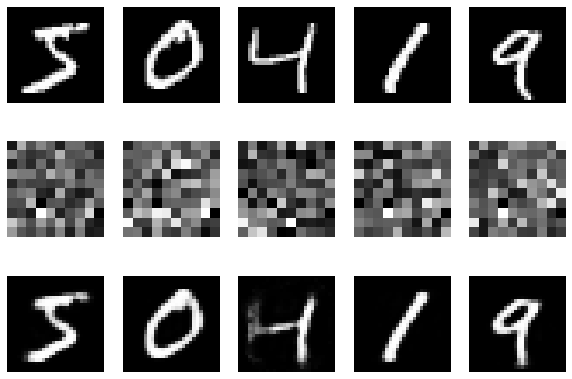

In [11]:
images = images.reshape((-1, 28, 28))
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        